## <b> Seasonal differencing

When a time series exhibits seasonality of a known time period of m time indices, it can be stationarized by taking seasonal differences between xt and xt-m. These differences taken at lags of length m are indicative of the seasons or quarters in a year. In this case m = 12 and the differences are taken between original observations that are a year apart from each other. The seasonal differences can be expressed as follows:

\begin{align}
\dot{x}_t & = x_t - x_{t-m} = Єt\\
\end{align}

In [1]:
import os
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt

/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#Read data from Excel file
daily_temp = pd.read_excel('../Data Files/mean-daily-temperature-fisher-river.xlsx', parse_date=['Date'])

In [3]:
#Display first 5 rows of the DataFrame
daily_temp.head(5)

,Date,Mean_Temperature
0,1988-01-01,-23.0
1,1988-01-02,-20.5
2,1988-01-03,-22.0
3,1988-01-04,-30.5
4,1988-01-05,-31.0


In [4]:
#Make formatted date as the row index of the dataset and drop the Date column
daily_temp.index = daily_temp['Date']
daily_temp.drop('Date', axis=1, inplace=True)

In [5]:
#Re-display the first 10 rows of the modified DataFrame
daily_temp.head(5)

,Mean_Temperature
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


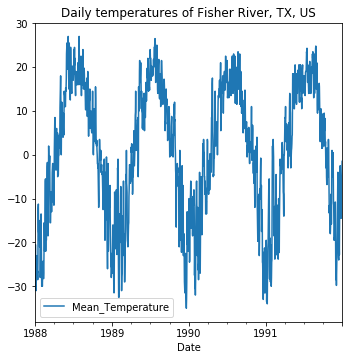

In [6]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US')
daily_temp.plot(ax=ax)

In [7]:
#Calculate monthly mean temperature
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head(5)

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
Freq: M, Name: Mean_Temperature, dtype: float64

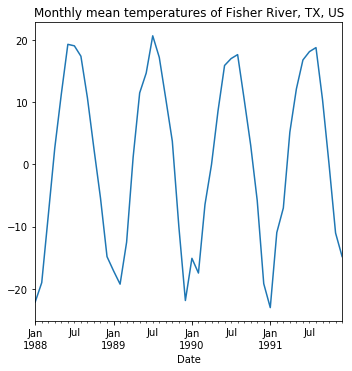

In [8]:
#Plot the monthly mean temparature
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax)

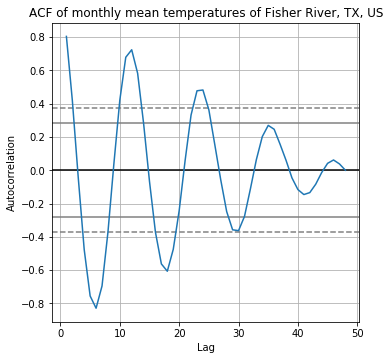

In [9]:
# Plot ACF of the monthly mean temparature using pandas.tools.plotting.autocorrelation_plot
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax)

In [10]:
# Take seasonal differences with a period of 12 months on monthly mean temperatures
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

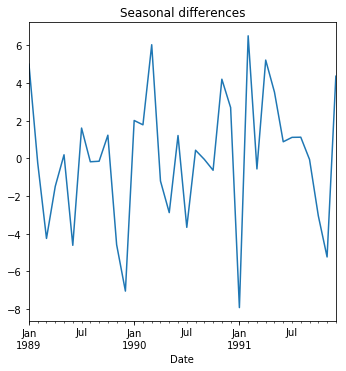

In [11]:
# Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences')
seasonal_diff.plot(ax=ax)

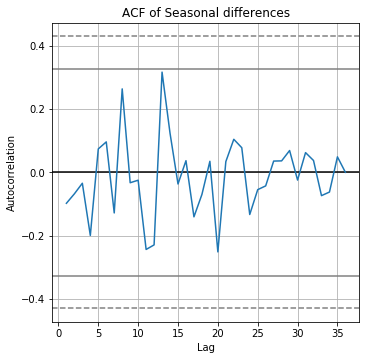

In [12]:
# Plot the seasonal differences
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences')
autocorrelation_plot(seasonal_diff, ax=ax)

In [13]:
# Perform Ljung-Box test on monthly mean temperature to get the p-values
# We will use lags of upto 10

# acceptance of null hypothesis confirms stationarity of the time series.

# p-val > alpha Null hypothesis is not rejected means stationary series
# p-val < alpha Null hypothesis is rejected means non-stationary series
_, _, _, pval_monthly_mean = stattools.acf(
    monthly_mean_temp, unbiased=True, nlags=10, qstat=True, alpha=0.05
)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


In [14]:
# Perform Ljung-Box test on monthly mean temperature to get the p-values
# We will use lags of upto 10

# acceptance of null hypothesis confirms stationarity of the time series.

# p-val > alpha Null hypothesis is not rejected means stationary series
# p-val < alpha Null hypothesis is rejected means non-stationary series
_, _, _, pval_seasonal_diff = stattools.acf(
    seasonal_diff, unbiased=True, nlags=10, qstat=True, alpha=0.05
)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


#### <b> Summary table:

<table>
<tr>
    <td> 
        <b>Tests</b>
    </td>
    <td> 
        <b>Augmented Dickey-Fuller (ADF)</b>
    </td>
    <td> 
        <b>Ljung-Box</b>
    </td>
    <td> 
        <b>p-values</b>
    </td>
</tr>

<tr>
    <td> 
    Null Hypothesis
    </td>
    <td> 
    Non Stationary
    </td>
    <td> 
    Stationary
    </td>
    <td> 
    Reject < alpha or Accept > alpha
    </td>
</tr>
<tr>
    <td> 
    Alternative Hypothesis
    </td>
    <td> 
    Stationary
    </td>
    <td> 
    Non Stationary
    </td>
    <td> 
    Reject > alpha or Accept < alpha
    </td>
</tr>
</table>